# Predict Airbnb Rent Price in Rio de Janeiro

The main goal of this Jupyter notebook is to use the Airbnb dataset available on [Inside Airbnb - Rio de Janeiro](https://insideairbnb.com/rio-de-janeiro/) to train a model that can predict the rental price of an apartment or house located in a specific region of Rio de Janeiro. The analysis will be divided into two parts: **Exploratory Data Analysis (EDA)** and **Model Training**.

### Features

The model will use the following basic characteristics:

- **Bedrooms**: The number of bedrooms in the listing.
- **Bathrooms**: The number of bathrooms in the listing.
- **Beds**: The number of beds available.
- **Availability**: The number of days the listing is available for rent.

### Dataset

The dataset used is provided by Inside Airbnb and contains data on Airbnb listings in Rio de Janeiro, Brazil. You can find the dataset at the following link: [Airbnb Data - Rio de Janeiro](https://insideairbnb.com/rio-de-janeiro/).

## EDA (Exploratory Data Analysis)

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

# Display more data on screen
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", 100)

### Loading data

In [2]:
df_listing = pd.read_csv('./dataset/listings.csv.gz')

### Checking data stats

In [3]:
df_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.466400e+04,3.466400e+04,3.466400e+04,34664.000000,34664.000000,0.0,34664.000000,34664.000000,34664.000000,33824.000000,34526.000000,33822.000000,34664.000000,34664.000000,34664.000000,34664.000000,34664.000000,34664.000000,34664.000000,34664.000000,0.0,34664.000000,34664.000000,34664.000000,34664.000000,34664.000000,34664.000000,34664.000000,26218.000000,26209.000000,26209.000000,26209.000000,26209.000000,26209.000000,26207.000000,0.0,34664.000000,34664.000000,34664.000000,34664.000000,26218.000000
mean,5.590520e+17,2.024063e+13,1.979962e+08,17.522011,29.340497,NaN,-22.967415,-43.248751,4.014828,1.551842,1.557927,2.271953,3.683360,417.116576,3.377568,4.295407,513.618163,540.409618,3.723612,526.161271,NaN,19.990769,43.284676,65.243163,203.164695,22.303658,7.660282,0.560582,4.801964,4.815802,4.764554,4.891008,4.880754,4.864992,4.719634,NaN,9.070909,8.235951,0.708891,0.120846,1.086423
std,4.785128e+17,0.000000e+00,1.898936e+08,95.340481,151.079569,NaN,0.034793,0.099478,2.337222,1.007230,1.047180,2.097083,14.203589,413.816918,12.032285,14.454098,451.914590,455.763149,12.883421,449.312439,NaN,11.114318,20.419548,28.678010,116.524265,44.086305,12.011221,1.141198,0.362256,0.359647,0.403395,0.284292,0.298894,0.291940,0.406434,NaN,24.042257,23.938462,1.851507,0.985730,1.195325
min,1.787800e+04,2.024063e+13,3.607000e+03,1.000000,1.000000,NaN,-23.073276,-43.723009,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.616128e+07,2.024063e+13,2.714992e+07,1.000000,1.000000,NaN,-22.984610,-43.303282,2.000000,1.000000,1.000000,1.000000,1.000000,60.000000,1.000000,2.000000,90.000000,90.000000,1.300000,90.000000,NaN,11.000000,31.000000,50.000000,90.000000,1.000000,0.000000,0.000000,4.750000,4.780000,4.690000,4.890000,4.880000,4.850000,4.640000,NaN,1.000000,1.000000,0.000000,0.000000,0.230000
50%,7.271246e+17,2.024063e+13,1.130967e+08,2.000000,3.000000,NaN,-22.972840,-43.194384,4.000000,1.000000,1.000000,2.000000,2.000000,365.000000,2.000000,3.000000,365.000000,365.000000,2.000000,365.000000,NaN,26.000000,54.000000,78.000000,190.000000,5.000000,2.000000,0.000000,4.920000,4.930000,4.900000,5.000000,5.000000,4.970000,4.820000,NaN,2.000000,1.000000,0.000000,0.000000,0.670000
75%,1.027123e+18,2.024063e+13,3.710267e+08,6.000000,8.000000,NaN,-22.956465,-43.185429,5.000000,2.000000,2.000000,3.000000,3.000000,365.000000,3.000000,4.000000,1125.000000,1125.000000,3.000000,1125.000000,NaN,29.000000,59.000000,89.000000,320.000000,24.000000,10.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,5.000000,3.000000,1.000000,0.000000,1.540000
max,1.187209e+18,2.024063e+13,5.856746e+08,2637.000000,6430.000000,NaN,-22.749950,-43.104400,16.000000,29.000000,30.000000,56.000000,1000.000000,1125.000000,630.000000,1125.000000,1125.000000,1125.000000,630.000000,1125.000000,NaN,30.000000,60.000000,90.000000,365.000000,674.000000,132.000000,20.000000,5.000000,5.000000,5.000000,5.000000,5.000000,

In [4]:
## Check null values percentages
df_listing.isna().mean().sort_values(ascending=True)

id                                              0.000000
listing_url                                     0.000000
scrape_id                                       0.000000
last_scraped                                    0.000000
source                                          0.000000
name                                            0.000000
host_id                                         0.000000
picture_url                                     0.000000
host_since                                      0.000000
host_name                                       0.000000
host_url                                        0.000000
neighbourhood_cleansed                          0.000000
host_picture_url                                0.000000
host_listings_count                             0.000000
host_total_listings_count                       0.000000
host_thumbnail_url                              0.000000
longitude                                       0.000000
latitude                       

### Cleansing data

In [5]:
## remove useless columns, mainly URL ones, but keeping information whereas
## property has that information or not.
df_listing = df_listing.drop(
    [
        "scrape_id",
        "listing_url",
        "last_scraped",
        "host_acceptance_rate",
        "calendar_updated",
        "neighbourhood_group_cleansed",
        "license"
    ],
    axis=1,
)
url_columns = [c for c in df_listing.columns if "_url" in c]
for c in url_columns:
    df_listing["has_" + c] = df_listing[c].isnull()

df_listing = df_listing.drop(url_columns, axis=1)

In [6]:
df_listing.property_type.value_counts()

property_type
Entire rental unit                    21966
Private room in rental unit            4101
Entire condo                           1709
Entire home                            1645
Private room in home                   1193
Entire loft                             731
Entire serviced apartment               729
Private room in condo                   359
Room in hotel                           262
Private room in bed and breakfast       260
Shared room in rental unit              238
Shared room in home                     160
Entire guesthouse                       117
Entire villa                             90
Room in aparthotel                       88
Private room in guest suite              86
Private room in guesthouse               84
Shared room in bed and breakfast         74
Entire guest suite                       63
Private room in serviced apartment       63
Shared room in hostel                    58
Tiny home                                45
Private room in to

<Axes: >

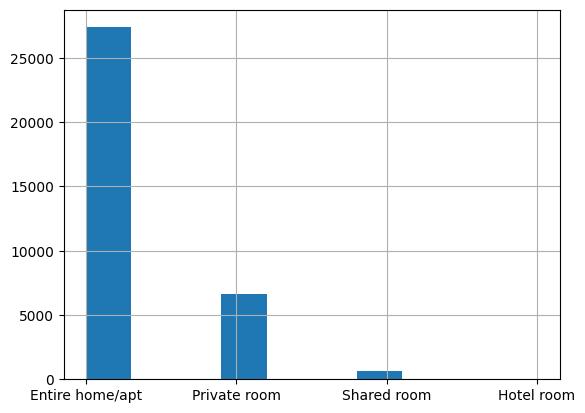

In [7]:
df_listing.room_type.hist()

array([[<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'beds'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'availability_30'}>],
       [<Axes: title={'center': 'availability_60'}>,
        <Axes: title={'center': 'availability_90'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

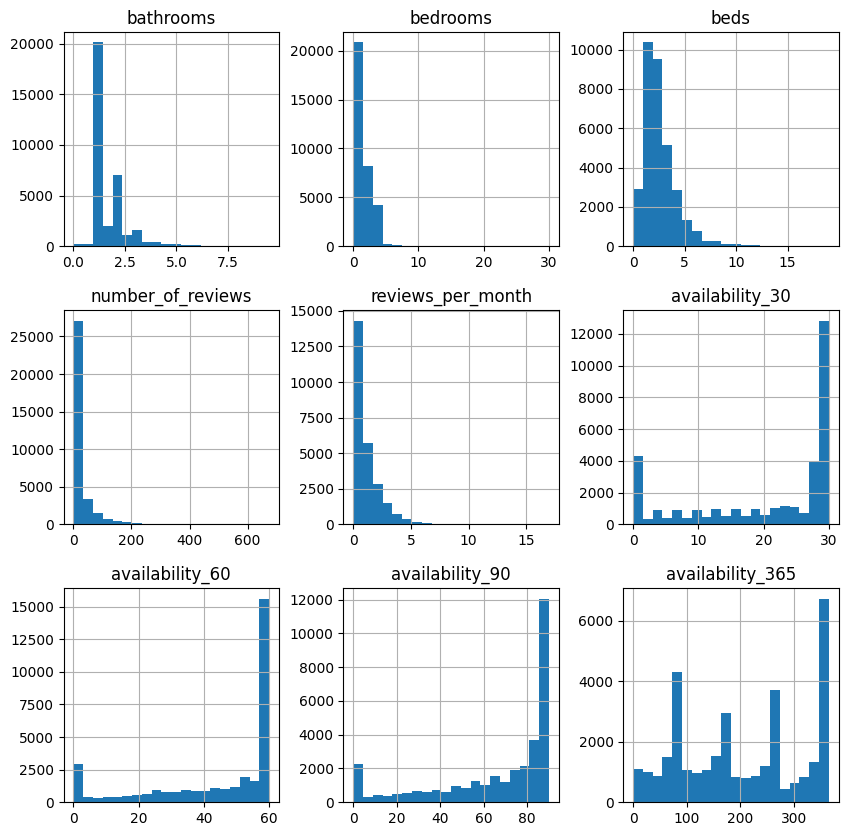

In [8]:
## There's a property with 200 bathrooms and another with 69 beds. Excluding
## data for visualization

df_listing[(df_listing.bathrooms < 10) & (df_listing.beds < 20)][
    [
        "bathrooms",
        "bedrooms",
        "beds",
        "number_of_reviews",
        "reviews_per_month",
        "availability_30",
        "availability_60",
        "availability_90",
        "availability_365",
    ]
].hist(figsize=(10, 10), bins=20)

In [9]:
# Ensure 'price' column is properly formatted
df_listing["price"] = df_listing["price"].replace("[\$,]", "", regex=True).astype(float)

# Clean the dataset by excluding rows where 'review_scores_value' is less than 3
df_cleaned = df_listing[df_listing["review_scores_value"] >= 3]

# Group by 'neighbourhood_cleansed' and describe 'price' column
price_stats = df_cleaned.groupby("neighbourhood_cleansed")[
    ["price", "review_scores_value"]
].describe()

# Filter groups where count of listings is greater than 10
filtered_stats = price_stats[price_stats[("price", "count")] >= 100].sort_values(
    ("price", "50%"), ascending=False
)

# Display the filtered and sorted result
filtered_stats

price                                           \
                           count         mean          std    min     25%   
neighbourhood_cleansed                                                      
São Conrado                133.0  1167.796992  1756.577978   55.0  300.00   
Leblon                    1294.0   702.927357  1001.942783  100.0  343.25   
Lagoa                      173.0  1005.364162  3499.693664   69.0  290.00   
Ipanema                   2630.0   692.147909  1319.441604   50.0  300.00   
Barra da Tijuca           2271.0   693.026860  1623.756918   55.0  274.50   
Gávea                      150.0   659.266667  1233.978025   98.0  250.25   
Recreio dos Bandeirantes  1070.0   463.225234   552.876403   63.0  201.00   
Jardim Botânico            137.0   496.386861   581.746537   77.0  185.00   
Humaitá                    107.0   425.168224   806.771898   80.0  187.50   
Leme                       541.0   460.436229   924.697557   53.0  200.00   
Jacarepaguá                996.0   431.641566   488.727180   64.0  192.50   
Copacabana                8578.0   434.180695  1052.641848   40.0  199.00   
Laranjeiras                364.0   381.151099   470.371662   38.0  168.50   
Flamengo                   619.0   334.613893   387.786672   65.0  174.00   
Botafogo                  1122.0   371.732620   916.951168   50.0  163.00   
Vidigal                    162.0   436.351852  1097.988355   50.0  141.25   
Camorim                    441.0   344.850340  1555.570039   85.0  166.00   
Glória                     204.0   458.044118  2798.997733   66.0  149.50   
Catete                     224.0   266.531250   236.254174   67.0  143.00   
Santa Teresa               841.0   348.973841  1194.450107   50.0  125.00   
Tijuca                     283.0   235.176678   249.297560   40.0  100.00   
Centro                    1048.0   217.349237   239.801116   50.0  124.75   

                                                  review_scores_value  \
                            50%      75%      max               count   
neighbourhood_cleansed                                                  
São Conrado               600.0  1143.00  13000.0               134.0   
Leblon                    500.0   792.75  27857.0              1328.0   
Lagoa                     446.0   698.00  40000.0               174.0   
Ipanema                   443.0   736.00  50000.0              2684.0   
Barra da Tijuca           410.0   650.00  45000.0              2338.0   
Gávea                     367.5   689.25  13768.0               151.0   
Recreio dos Bandeirantes  324.5   500.00   8180.0              1086.0   
Jardim Botânico           320.0   600.00   4286.0               140.0   
Humaitá                   300.0   443.00   8286.0               120.0   
Leme                      299.0   500.00  20000.0               554.0   
Jacarepaguá               281.5   479.00   5029.0              1029.0   
Copacabana                270.0   414.00  51428.0              8772.0   
Laranjeiras               250.0   437.00   5857.0               367.0   
Flamengo                  245.0   372.00   7200.0               630.0   
Botafogo                  238.0   381.50  25000.0              1168.0   
Vidigal                   219.0   349.75   9500.0               165.0   
Camorim                   208.0   293.00  32685.0               457.0   
Glória                    202.0   284.50  40000.0               209.0   
Catete                    194.0   313.00   2000.0               230.0   
Santa Teresa              189.0   300.00  30000.0               850.0   
Tijuca                    165.0   259.50   1778.0               290.0   
Centro                    161.0   241.00   4500.0              1067.0   

                                                                              
                              mean       std   min     25%    50%   75%  max  
neighbourhood_cleansed                                                        
São Conrado               4.746567  0.

In [10]:
# Step 1: Extract the 'neighbourhood_cleansed' values from filtered_stats
neighbourhoods_to_keep = filtered_stats.index.get_level_values("neighbourhood_cleansed")

# Step 2: Filter df_cleaned to keep only rows with these 'neighbourhood_cleansed' values
df_filtered = df_cleaned[
    df_cleaned["neighbourhood_cleansed"].isin(neighbourhoods_to_keep)
]

# # Display the filtered DataFrame
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23943 entries, 0 to 34525
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23943 non-null  int64  
 1   source                                        23943 non-null  object 
 2   name                                          23943 non-null  object 
 3   description                                   23255 non-null  object 
 4   neighborhood_overview                         13749 non-null  object 
 5   host_id                                       23943 non-null  int64  
 6   host_name                                     23943 non-null  object 
 7   host_since                                    23943 non-null  object 
 8   host_location                                 20038 non-null  object 
 9   host_about                                    12387 non-null  obje

### Checking correlation between all variables and price

In [11]:
# Identify categorical columns to be encoded (exclude columns like ID, URL, etc.)
categorical_columns = df_filtered.select_dtypes(include=["object"]).columns

# Applied log in price variable in order to handle Skewness and Reducing Outliers Impact
df_filtered["price"] = np.log(df_filtered["price"])

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df_filtered, columns=categorical_columns, drop_first=True)

# Select only numeric columns (including the newly one-hot encoded columns)
numeric_df = df_encoded.select_dtypes(include=["number"])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Get the correlation of all attributes with 'price'
price_correlation = correlation_matrix["price"].sort_values(ascending=False)

# Display the correlation of attributes with price
print(price_correlation)

price                                           1.000000
bedrooms                                        0.543896
bathrooms                                       0.517367
accommodates                                    0.495789
beds                                            0.343683
availability_365                                0.118269
review_scores_location                          0.100540
host_total_listings_count                       0.094181
host_listings_count                             0.086892
calculated_host_listings_count_entire_homes     0.085419
calculated_host_listings_count                  0.069387
minimum_minimum_nights                          0.058760
review_scores_rating                            0.055425
minimum_nights_avg_ntm                          0.052690
minimum_nights                                  0.050635
maximum_minimum_nights                          0.047877
availability_90                                 0.047430
availability_30                

### Reduced dataset based on high correlated attributes

In [12]:
attributes_list = [
    "price",
    "bathrooms",
    "bedrooms",
    "accommodates",
    "beds",
    "availability_365",
    "neighbourhood_cleansed"
]
df_to_train = df_filtered[
attributes_list
]

df_to_train["neighbourhood_cleansed"] = (
    df_to_train["neighbourhood_cleansed"]
    .str.upper()
    .str.replace(" ", "_")
    .str.replace("Á", "A")
    .str.replace("Ã", "A")
    .str.replace("Â", "A")
    .str.replace("Ç", "C")
    .str.replace("Í", "I")
    .str.replace("Ó", "O")
    .str.replace("Ú", "U")
    .str.replace("É", "E")
    .str.replace("Ê", "E")
    .str.replace("FREGUESIA_(JACAREPAGUA)", "FREGUESIA")
)

In [13]:
df_to_train.head(10)

,price,bathrooms,bedrooms,accommodates,beds,availability_365,neighbourhood_cleansed
0,5.736572,1.0,2.0,5,2.0,274,COPACABANA
1,5.313206,1.0,1.0,3,2.0,241,COPACABANA
2,5.393628,1.0,1.0,2,1.0,283,TIJUCA
3,5.303305,1.5,1.0,2,1.0,93,COPACABANA
4,5.771441,1.0,1.0,2,1.0,348,IPANEMA
5,5.075174,1.0,1.0,2,1.0,185,COPACABANA
6,5.129899,1.0,1.0,3,1.0,132,JACAREPAGUA
7,7.880426,7.0,6.0,13,7.0,294,IPANEMA
8,5.075174,1.0,1.0,4,1.0,217,COPACABANA
9,5.857933,NaN,1.0,4,1.0,119,COPACABANA


In [14]:
df_to_train.shape

(23943, 7)

## Trainning model

### Split Data into Training and Test Sets Using Holdout

To evaluate model performance, we will split the dataset into training and test sets using the holdout method. This involves dividing the data into two parts: one for training the model and another for testing its performance on unseen data.


In [15]:
# Drop rows with NaN values in a specific column (e.g., 'price')
df_cleaned = df_to_train.dropna()

test_size = 0.20  # test set size
seed = 7  # random seed

# Separate the features (X) and target (y)
X = df_cleaned.drop('price', axis=1)
y = df_cleaned["price"]

# Apply one-hot encoding to 'neighbourhood_cleansed' with custom naming pattern
X = pd.get_dummies(
    X,
    columns=["neighbourhood_cleansed"],
    prefix="neighbourhood",  # Prefix to use for the new columns
    prefix_sep="_",
)  # Separator between prefix and category value


# Check the shape after one-hot encoding
print(X.shape)
print(y.shape)

# Split into training and test sets (no stratification for regression)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, shuffle=True, random_state=seed
)

# Parameters and partitions for cross-validation
scoring = "neg_mean_squared_error"  # or 'r2', 'neg_mean_absolute_error' for regression
num_particoes = 10  # number of folds

# Use KFold for regression
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed)

# Display results of data partitioning
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

(23360, 27)
(23360,)
X_train shape: (18688, 27), X_test shape: (4672, 27)
y_train shape: (18688,), y_test shape: (4672,)


In [16]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('./imoveis_golden.csv')
train_data.head(10)

,bathrooms,bedrooms,accommodates,beds,availability_365,neighbourhood_BARRA_DA_TIJUCA,neighbourhood_BOTAFOGO,neighbourhood_CAMORIM,neighbourhood_CATETE,neighbourhood_CENTRO,neighbourhood_COPACABANA,neighbourhood_FLAMENGO,neighbourhood_GAVEA,neighbourhood_GLORIA,neighbourhood_HUMAITA,neighbourhood_IPANEMA,neighbourhood_JACAREPAGUA,neighbourhood_JARDIM_BOTANICO,neighbourhood_LAGOA,neighbourhood_LARANJEIRAS,neighbourhood_LEBLON,neighbourhood_LEME,neighbourhood_RECREIO_DOS_BANDEIRANTES,neighbourhood_SANTA_TERESA,neighbourhood_SAO_CONRADO,neighbourhood_TIJUCA,neighbourhood_VIDIGAL,price
29231,0.0,1.0,3,0.0,90,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,5.736572
20365,2.0,2.0,5,2.0,209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,5.991465
33313,1.0,2.0,6,3.0,85,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,5.579730
29957,1.0,1.0,3,0.0,356,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,5.560682
15173,1.0,1.0,4,2.0,164,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.595120
2220,3.0,3.0,6,3.0,8,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.309918
9632,2.0,2.0,5,4.0,242,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.551080
10695,1.0,1.0,3,2.0,35,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,5.924256
22742,3.0,3.0,7,5.0,77,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,5.828946
647,2.0,2.0,3,3.0,364,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,5.958425


In [17]:
X.columns

Index(['bathrooms', 'bedrooms', 'accommodates', 'beds', 'availability_365',
       'neighbourhood_BARRA_DA_TIJUCA', 'neighbourhood_BOTAFOGO',
       'neighbourhood_CAMORIM', 'neighbourhood_CATETE', 'neighbourhood_CENTRO',
       'neighbourhood_COPACABANA', 'neighbourhood_FLAMENGO',
       'neighbourhood_GAVEA', 'neighbourhood_GLORIA', 'neighbourhood_HUMAITA',
       'neighbourhood_IPANEMA', 'neighbourhood_JACAREPAGUA',
       'neighbourhood_JARDIM_BOTANICO', 'neighbourhood_LAGOA',
       'neighbourhood_LARANJEIRAS', 'neighbourhood_LEBLON',
       'neighbourhood_LEME', 'neighbourhood_RECREIO_DOS_BANDEIRANTES',
       'neighbourhood_SANTA_TERESA', 'neighbourhood_SAO_CONRADO',
       'neighbourhood_TIJUCA', 'neighbourhood_VIDIGAL'],
      dtype='object')

### Creating models

In [18]:
# Creating a list to store better regression models
models = []

# Adding regression models to the list
models.append(("Linear Regression", LinearRegression()))
models.append(("Ridge Regression", Ridge()))
models.append(("Lasso Regression", Lasso()))
models.append(("KNN", KNeighborsRegressor()))
models.append(("Decision Tree", DecisionTreeRegressor()))
models.append(("Random Forest", RandomForestRegressor()))
models.append(("Gradient Boosting", GradientBoostingRegressor()))
models.append(("SVM", SVR()))

# Display the list of models
for name, model in models:
    print(f"Model: {name}, Type: {model}")

Model: Linear Regression, Type: LinearRegression()
Model: Ridge Regression, Type: Ridge()
Model: Lasso Regression, Type: Lasso()
Model: KNN, Type: KNeighborsRegressor()
Model: Decision Tree, Type: DecisionTreeRegressor()
Model: Random Forest, Type: RandomForestRegressor()
Model: Gradient Boosting, Type: GradientBoostingRegressor()
Model: SVM, Type: SVR()


### Checking results for each model and export best model to a *.pkl file
The best model will be the one with the lowest RMSE (Root Mean Squared Error). 

Linear Regression: 0.325381 (0.014803)
Ridge Regression: 0.325382 (0.014803)
Lasso Regression: 0.577828 (0.023164)
KNN: 0.342793 (0.015690)
Decision Tree: 0.515311 (0.025989)
Random Forest: 0.327511 (0.013324)
Gradient Boosting: 0.285233 (0.008734)
SVM: 0.308219 (0.012203)


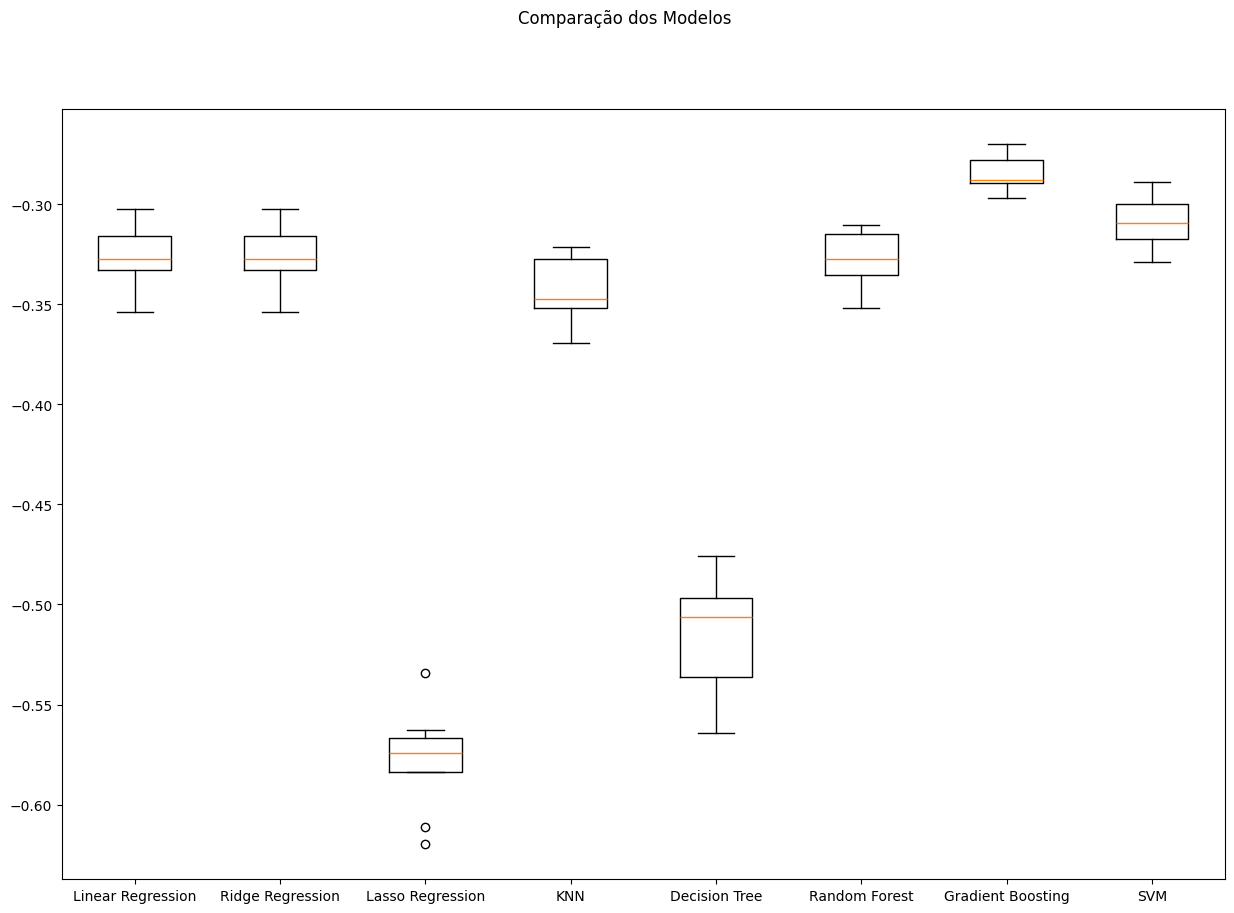

Best model ('Gradient Boosting') saved to 'best_model.pkl' with RMSE: 0.28523268301452803


In [19]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Listas para armazenar os resultados
results = []
names = []
best_model = None
best_model_name = None
lowest_rmse = float("inf")  # Initialize with infinity to find the minimum

# Define the best scoring for regression models
scoring = "neg_mean_squared_error"  # You can also use 'r2' or 'neg_mean_absolute_error'

# Avaliação dos modelos
for name, model in models:
    # Create a pipeline with StandardScaler and the regression model
    pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),  # Step 1: Standardize features
            ("model", model),  # Step 2: Apply the model
        ]
    )

    # Perform cross-validation with the pipeline
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring=scoring)
    rmse = -cv_results.mean()  # Convert negative MSE to positive RMSE
    results.append(cv_results)
    names.append(name)

    # Print results
    msg = "%s: %f (%f)" % (name, rmse, cv_results.std())
    print(msg)

    # Check if this model has the lowest RMSE
    if rmse < lowest_rmse:
        lowest_rmse = rmse
        best_model = pipeline
        best_model_name = name

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15, 10))
fig.suptitle("Comparação dos Modelos")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Export the best model to a .pkl file
if best_model:
    best_model.fit(X_train, y_train)
    with open("best_model.pkl", "wb") as file:
        pickle.dump(best_model, file)
    print(
        f"Best model ('{best_model_name}') saved to 'best_model.pkl' with RMSE: {lowest_rmse}"
    )
else:
    print("No model was found.")

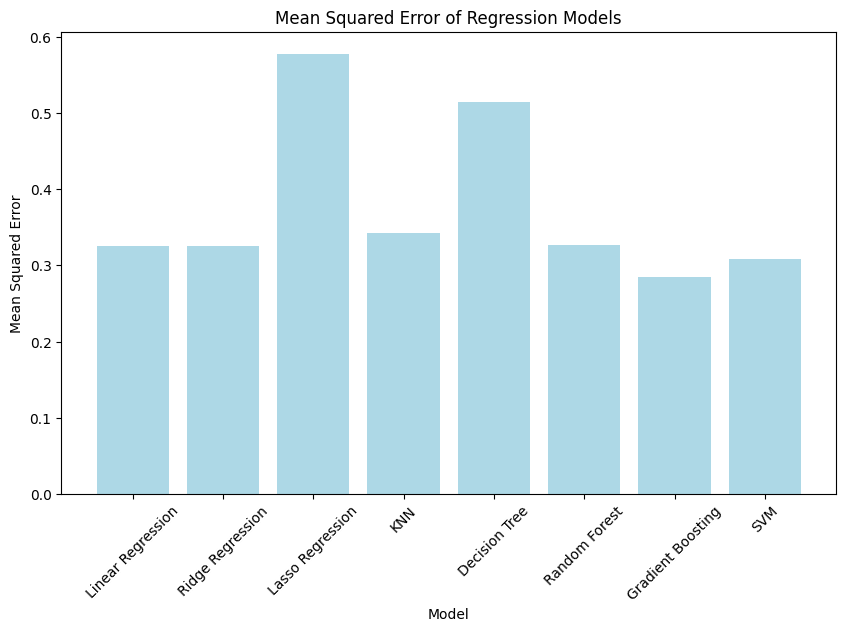

In [20]:
# Calculate the mean scores
mean_scores = [-result.mean() for result in results]  # Convert MSE from negative

# Bar chart of mean scores
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(names, mean_scores, color="lightblue")
ax.set_title("Mean Squared Error of Regression Models")
ax.set_xlabel("Model")
ax.set_ylabel("Mean Squared Error")
plt.xticks(rotation=45)
plt.show()